### 01. Import Dependecies

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr

### 02. Data Loading

In [2]:
df = pd.read_csv('data/processed/Missing_Values_Handled.csv')
df.head()

,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
0,TikTok,#Challenge,Video,UK,4163464,339431,53135,19346,High
1,Instagram,#Education,Shorts,India,4155940,215240,65860,27239,Medium
2,Twitter,#Challenge,Video,Brazil,3666211,327143,39423,36223,Medium
3,YouTube,#Education,Shorts,Australia,917951,127125,11687,36806,Low
4,TikTok,#Dance,Post,Brazil,64866,171361,69581,6376,Medium


### 03. Data Visualization

#### 3.1 Correlation Patterns

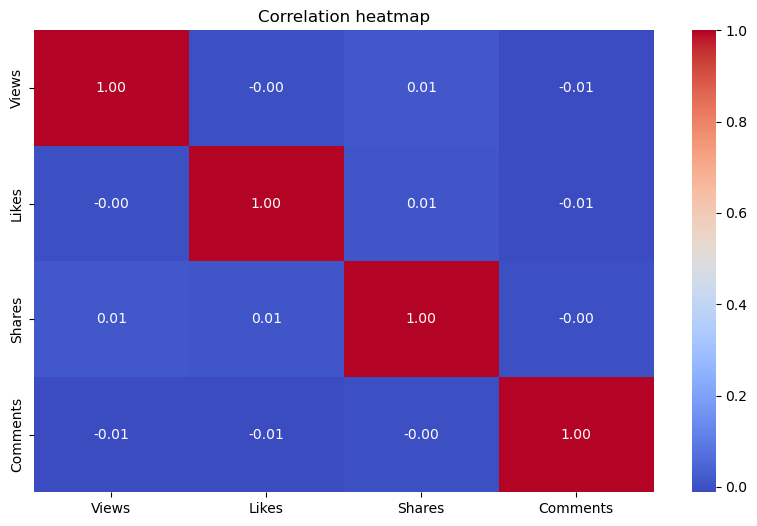

In [18]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation heatmap")
plt.savefig('figures/correlation_pattern.jpg')
plt.show()

##### 3.1.1 statistical tests

In [30]:
columns = ['Views','Likes','Shares','Comments']

for col in columns:
    print(f"\n--------------- {col} vs Other Metrics -----------------\n")
    for col2 in columns:
        corr, p_value = pearsonr(df[col], df[col2])
        significance = 'Correlated' if p_value < 0.05 else 'No correlation'
        print(f"{col2:10} | Correlation: {corr:.3f} | p-value: {p_value:.4f} | {significance}")



--------------- Views vs Other Metrics -----------------

Views      | Correlation: 1.000 | p-value: 0.0000 | Correlated
Likes      | Correlation: -0.003 | p-value: 0.8223 | No correlation
Shares     | Correlation: 0.013 | p-value: 0.3528 | No correlation
Comments   | Correlation: -0.010 | p-value: 0.4815 | No correlation

--------------- Likes vs Other Metrics -----------------

Views      | Correlation: -0.003 | p-value: 0.8223 | No correlation
Likes      | Correlation: 1.000 | p-value: 0.0000 | Correlated
Shares     | Correlation: 0.011 | p-value: 0.4304 | No correlation
Comments   | Correlation: -0.012 | p-value: 0.4053 | No correlation

--------------- Shares vs Other Metrics -----------------

Views      | Correlation: 0.013 | p-value: 0.3528 | No correlation
Likes      | Correlation: 0.011 | p-value: 0.4304 | No correlation
Shares     | Correlation: 1.000 | p-value: 0.0000 | Correlated
Comments   | Correlation: -0.000 | p-value: 0.9926 | No correlation

--------------- Comments

##### According to the result of heatmap Views, Likes, Shares, and Comments are essentially independent of each other.

#### 3.2 Distribution Plots

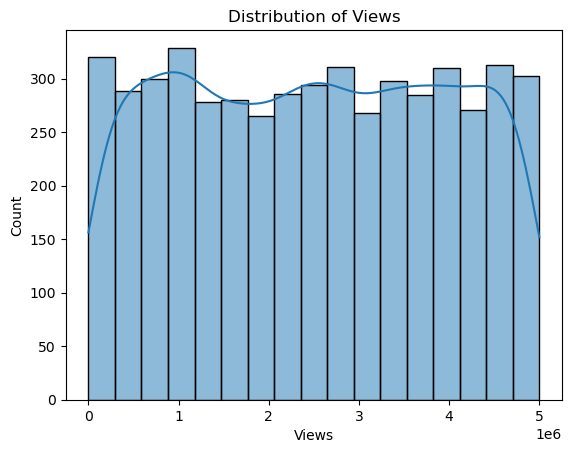

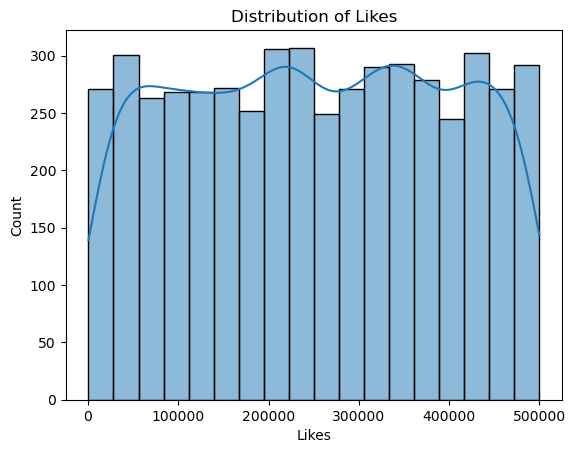

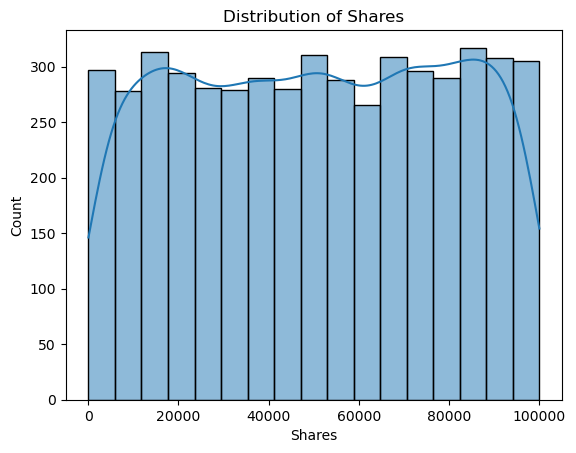

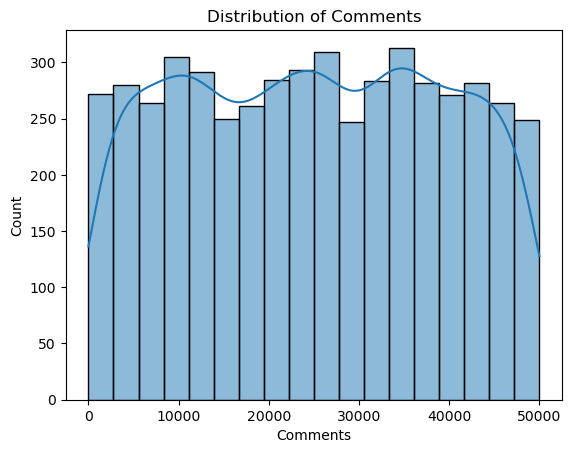

In [19]:
for col in ['Views','Likes','Shares','Comments']:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.savefig(f'figures/distribution_plots/distribution_of_{col}.jpg')
    plt.show()

#### 3.3 Scatter Plots

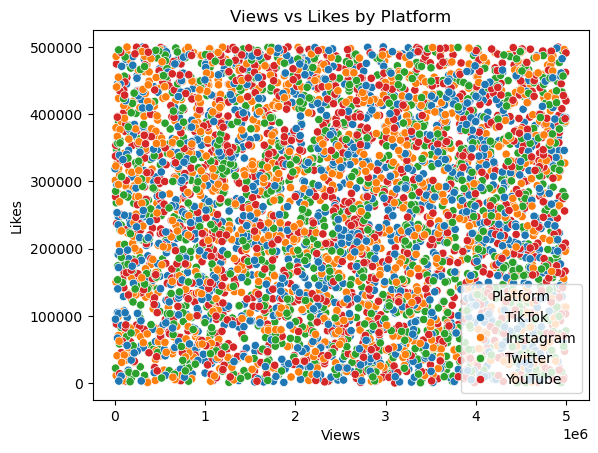

In [20]:
sns.scatterplot(x='Views', y='Likes', hue='Platform', data=df)
plt.title('Views vs Likes by Platform')
plt.savefig('figures/scatter_plots.jpg')
plt.show()

##### There is no relationship between Views and Likes — across all platforms. Most posts get views without likes. A few get both. Platform doesn’t change the story

#### 3.4 Bar Chart (Performance Across Platforms)

In [13]:
platform_avg = df.groupby('Platform')[['Views','Likes','Shares','Comments']].mean().reset_index()

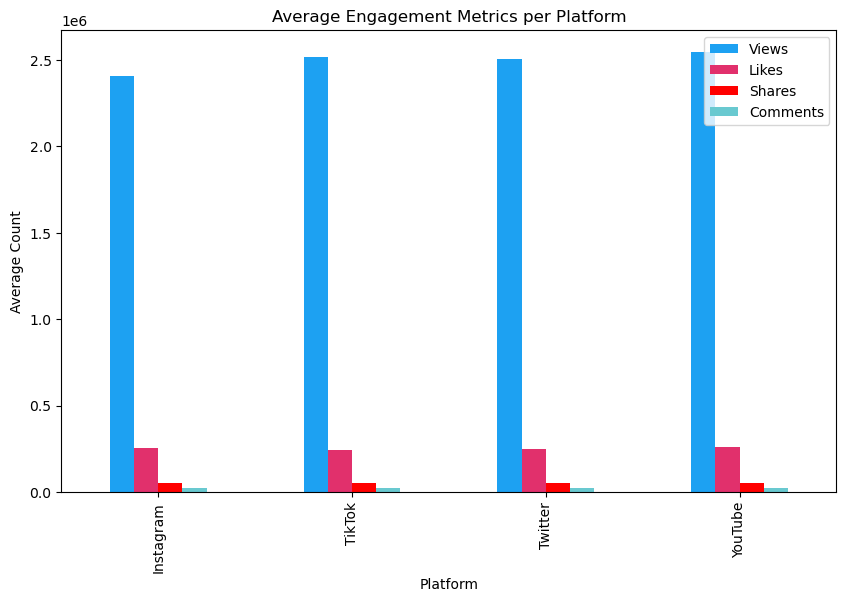

In [21]:
platform_avg.plot(x='Platform', kind='bar', figsize=(10,6), color=['#1DA1F2','#E1306C','#FF0000','#69C9D0'])
plt.title('Average Engagement Metrics per Platform')
plt.ylabel('Average Count')
plt.savefig('figures/bar_chart.jpg')
plt.show()